# Getting input from the serial ports
First you need to make sure that pyserial is installed on your system. On my mac (Sierra) I followed the approach below, opening a terminal window and running pip to install the library. We did the same thing on Stacey's Windows 10 machine with the same success.

pip install pyserial

If that doesn't work, you could try: python -m pip install pyserial to install from inside the python package. If you have multiple versions of python installed it gets more complicated and you will have to sort that out on your own.

# Shut down Jupyter!

If you don't do a complete restart of Jupyter, it may not catch the library and the permissions to access the port -- we needed to do this on Windows, but got away without it on Mac. Then run the next cell to import the libraries.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
import serial
import serial.tools.list_ports

## Make sure the Arduino is plugged in and available

If the IDE and/or the serial monitor are open, Jupyter may not be able to get access to the serial port. Run the cell to see a list of serial ports, then use the right format in the next cell to open the port you have the arduino plugged into.

In [2]:
# Show a list of existing serial ports so you can decide what to open
ports = list(serial.tools.list_ports.comports())
for p in ports:
    print(p)

/dev/cu.Bluetooth-Incoming-Port - n/a
/dev/cu.usbmodemFD1461 - Generic CDC


In [3]:
# Serial port must not be in use by another application, or complex errors will show up
# Be sure the Arduino serial monitor is closed before you run this cell!
#ser = serial.Serial('/dev/cu.usbmodemFD14131',115200,timeout=1)
#ser = serial.Serial('/dev/cu.usbmodem1A1321',115200,timeout=1)
#ser = serial.Serial('/dev/cu.usbmodem1411',115200,timeout=1)
ser = serial.Serial('/dev/cu.usbmodemFD1461',115200,timeout=1)
#ser = serial.Serial('COM3',115200,timeout=1)

In [4]:
# for some reason, probably to do with multiple buffers, this doesn't catch up
ser.reset_input_buffer()   # throwaway everything in the buffer
line = ser.readline()      # get any part line and throw it away

In [5]:
def catchUp():   #not sure why this seems to work better
    while ser.in_waiting > 100:  # read just about everything that's there
        ser.reset_input_buffer()   # throwaway everything in the buffer
        ser.readline()
    ser.readline()
    
catchUp()
print("done")

done


In [6]:
catchUp()
for i in range(0,5):
    line = ser.readline().decode("utf-8")  # decode turns bytes into a string
    line = line.strip()
    print(line, type(line))
    mylist = line.split(",")
    print(float(mylist[0]),float(mylist[1]),float(mylist[2]))

11.30, -0.95, -1.00, 0.95 <class 'str'>
11.3 -0.95 -1.0
11.32, -0.95, -1.00, 0.95 <class 'str'>
11.32 -0.95 -1.0
11.34, -0.94, -1.00, 0.94 <class 'str'>
11.34 -0.94 -1.0
11.36, -0.93, -1.00, 0.93 <class 'str'>
11.36 -0.93 -1.0
11.39, -0.92, -1.00, 0.92 <class 'str'>
11.39 -0.92 -1.0


## This is kind of clunky
Making multiple separate 1D arrays for the data might get cumbersome if you wanted to work with some big tables with lots of columns. It will work for now as an illustration.

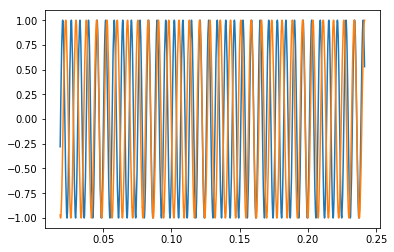

In [7]:
t = []
d1 = []
d2 = []

catchUp()
for i in range(0,1000):
    line = ser.readline().decode("utf-8")
    mylist = line.split(",")
    t.append(float(mylist[0])/1000)
    d1.append(float(mylist[1]))    
    d2.append(float(mylist[2]))
plt.plot(t,d1,t,d2)

In [ ]:
print(ser.isOpen())

In [ ]:
ser.close()